## overview

In [2]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve
import dataclasses as dc
import tempfile

In [24]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib
from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models, create_model, models, tune_model, plot_model, interpret_model

In [4]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [5]:
# reload settings
%load_ext autoreload
%autoreload 2

In [6]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [7]:
# graph setting
sns.set()
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

## load data

In [8]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## classifier

In [11]:
clf1 = setup(data, target = 'Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthr

In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8341,0.8925,0.7382,0.8140,0.7726,0.6427,0.6462,0.1860
ridge,Ridge Classifier,0.8341,0.0000,0.7594,0.8024,0.7780,0.6460,0.6491,0.0040
lda,Linear Discriminant Analysis,0.8328,0.8921,0.7664,0.7951,0.7782,0.6443,0.6470,0.0040
gbc,Gradient Boosting Classifier,0.8155,0.8873,0.7555,0.7648,0.7581,0.6091,0.6113,0.0230
ada,Ada Boost Classifier,0.8154,0.8847,0.7278,0.7808,0.7517,0.6052,0.6078,0.0200
catboost,CatBoost Classifier,0.8128,0.8929,0.7384,0.7670,0.7513,0.6014,0.6029,0.8910
xgboost,Extreme Gradient Boosting,0.7941,0.8710,0.7313,0.7336,0.7306,0.5642,0.5660,5.4470
lightgbm,Light Gradient Boosting Machine,0.7941,0.8758,0.7278,0.7353,0.7308,0.5641,0.5649,0.0460
rf,Random Forest Classifier,0.7887,0.8687,0.7171,0.7287,0.7204,0.5509,0.5534,0.0840
et,Extra Trees Classifier,0.7713,0.8357,0.7032,0.7028,0.7002,0.5159,0.5184,0.0750


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [16]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9445,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9018,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9153,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8267,0.9153,0.7241,0.8077,0.7636,0.6274,0.6298
4,0.8533,0.9258,0.7241,0.8750,0.7925,0.6806,0.6879
5,0.8933,0.9273,0.8276,0.8889,0.8571,0.7722,0.7735
6,0.7600,0.8058,0.6207,0.7200,0.6667,0.4808,0.4840
7,0.8133,0.8598,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.7838,0.8626,0.6786,0.7308,0.7037,0.5339,0.5348
9,0.7838,0.8672,0.6429,0.7500,0.6923,0.5272,0.5309


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [18]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## hyperparameter

In [20]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9490,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9040,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9190,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8267,0.9145,0.7241,0.8077,0.7636,0.6274,0.6298
4,0.8533,0.9258,0.7241,0.8750,0.7925,0.6806,0.6879
5,0.9067,0.9258,0.8621,0.8929,0.8772,0.8020,0.8023
6,0.7733,0.8103,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8000,0.8613,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.7973,0.8610,0.7143,0.7407,0.7273,0.5661,0.5663
9,0.7838,0.8665,0.6429,0.7500,0.6923,0.5272,0.5309


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## analyze

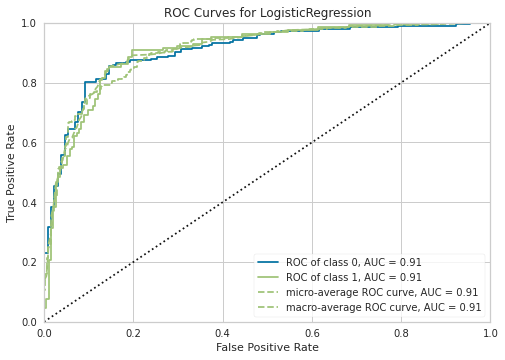

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(lr)

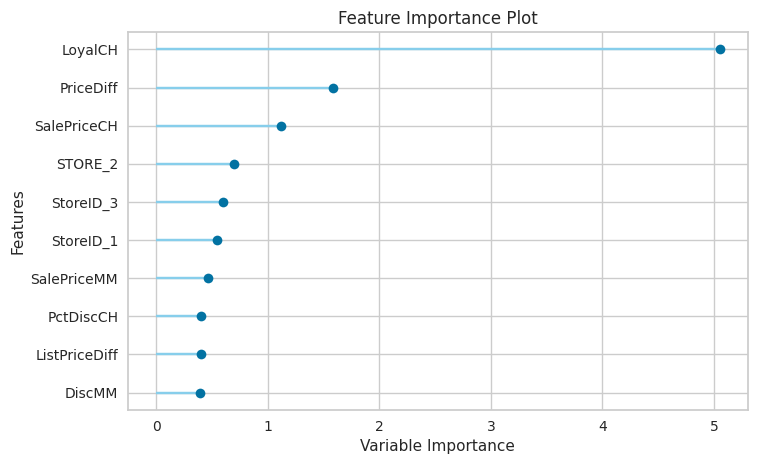

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(lr, plot = 'feature')